In [4]:
import sys
import os

sys.path.append('..')

from algo import sample_euler, v_s_t


### define dataset

In [ ]:
from torch.utils.data import DataLoader
import torchvision

train_dataset = torchvision.datasets.MNIST(root="../datasets", train=True, download=True, transform=torchvision.transforms.PILToTensor())
train_loader = DataLoader(train_dataset, batch_size=1152, shuffle=True)

### compute

In [39]:
import matplotlib.pyplot as plt
import torch

x, _ = train_loader.__iter__().__next__()
channels, height, width = x.shape[1], x.shape[2], x.shape[3]
image_size = height * width * channels
image_orginal_size = (channels, height, width)
x = x.reshape(x.shape[0], image_size) / 255.0

M = 450
z_0 = torch.randn(1, image_size)
sigma = 0.90

out = sample_euler(z_0, steps=50, x=x, sigma=sigma, M=M)

# plt.imshow(x[5].reshape(image_orginal_size).permute(1, 2, 0), cmap="gray", vmin=0, vmax=1)
# plt.colorbar()

100%|██████████| 50/50 [00:11<00:00,  4.24it/s]


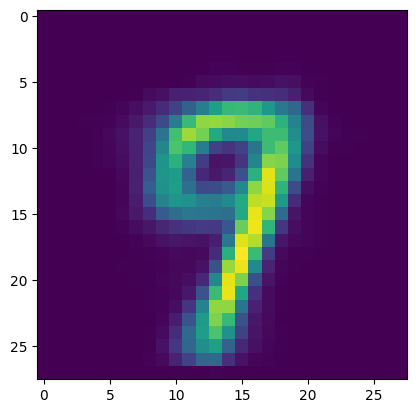

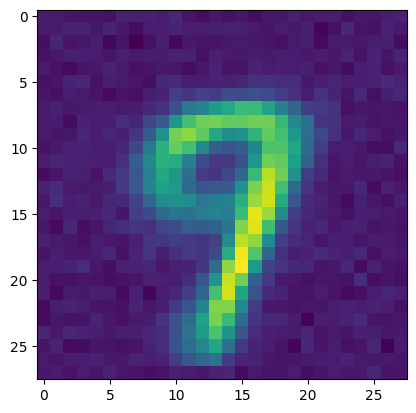

In [40]:
plt.imshow(out[-1].reshape(image_orginal_size).permute(1, 2, 0))
plt.show()
plt.imshow(out[-2].reshape(image_orginal_size).permute(1, 2, 0))
plt.show()

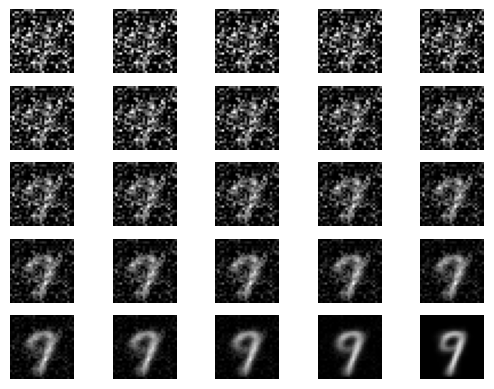

In [41]:
images = torch.stack(out[-26::])
for i in range(len(images) - 1):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i + 1].reshape(image_orginal_size).permute(1, 2, 0), cmap="gray", vmin=0, vmax=1)
    plt.axis("off")

### closest sample from dataset

100%|██████████| 60000/60000 [00:02<00:00, 24350.18it/s]


Text(0.5, 1.0, 'closest sample in dataset')

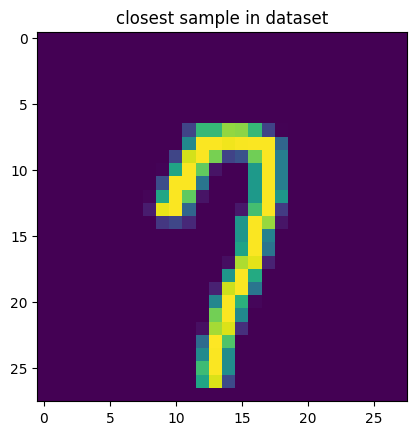

In [42]:
from tqdm import tqdm
import numpy as np
mses = []
with torch.inference_mode():
    # for sample in tqdm(pi_1):
    for sample in tqdm(train_dataset):

        mse_result = torch.nn.functional.mse_loss(sample[0].reshape(image_size) / 255.0, out[-1]).item()
        # mse_result = torch.nn.functional.mse_loss(sample, z_journey[-1]).item()
        mses.append(mse_result)

sample, _ = train_dataset[np.argmin(mses).item()]
plt.imshow(sample.permute(1, 2, 0))
plt.title("closest sample in dataset")